# **Experimentación TP3**

In [3]:
import numpy as np
import matplotlib as plt
import numpy.linalg as lng
from scipy.linalg import lu
from scipy import linalg
import networkx as nx
from scipy.stats.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
import utils 
sns.set_style("whitegrid")

Probando ejemplos

In [2]:
A = utils.leer_grafo('tests/test_aleatorio.txt')
utils.calcular_ranks('tests/test_aleatorio.txt', 0.76)

array([0.24074002, 0.21864311, 0.21864311, 0.24074002, 0.08123375])

# **GRAFOS PARTICULARES**

Supernodo

In [3]:
S = utils.armar_grafo_supernodo(40)

Antisupernodo

In [4]:
A = utils.armar_grafo_antisupernodo(40)

Supernodo al que le agregamos ejes

In [5]:
n = 10
p = 0.75
exp = utils.experimento_supernodo_le_agrego_ejes(n, p)

Anti-Supernodo al que le agregamos ejes

In [6]:
n = 10
p = 0.75
exp = utils.experimento_antisupernodo_le_agrego_ejes(n, p)

Clique

In [7]:
clique = nx.to_numpy_array(nx.complete_graph(50))
utils.generar_archivo_test_de_matriz("clique50.txt", clique)

Binomial graph

In [8]:
binomial_graph = nx.to_numpy_array(nx.binomial_graph(50, 0.5, seed = 2, directed= True))
print(np.mean(binomial_graph))
utils.generar_archivo_test_de_matriz("binomial_graph50_5.txt", binomial_graph)

0.476


## **Tiempos - test de la catedra**

Mediciones de tiempo tests de la catedra

In [9]:
utils.results_times("test_aleatorio.txt")

([0.024162016999999997, 0.030657515, 0.044978074],
 [0.000135123396286711, 0.000122808239773775, 0.001223475809412524])

## **Tiempos -nuestros grafos**

supernodo

In [20]:

supernodo10 = utils.read_results_time("test_supernodo_10.txtEG") + utils.read_results_time("test_supernodo_10.txtJac") + utils.read_results_time("test_supernodo_10.txtGS")

supernodo20 = utils.read_results_time("test_supernodo_20.txtEG") + utils.read_results_time("test_supernodo_20.txtJac") + utils.read_results_time("test_supernodo_20.txtGS")

supernodo30 = utils.read_results_time("test_supernodo_30.txtEG") + utils.read_results_time("test_supernodo_30.txtJac") + utils.read_results_time("test_supernodo_30.txtGS")

supernodo40 = utils.read_results_time("test_supernodo_40.txtEG") + utils.read_results_time("test_supernodo_40.txtJac") + utils.read_results_time("test_supernodo_40.txtGS")

supernodo50 = utils.read_results_time("test_supernodo_50.txtEG") + utils.read_results_time("test_supernodo_50.txtJac") + utils.read_results_time("test_supernodo_50.txtGS")

metodos = [i for k in range(0, 5) for i in ["EG", "Jac", "GS"] for j in range(0, 1000) ]

densidad = [i for i in range(10, 51, 10) for j in range(0, 1000) for k in range(0,3)]

resultados = supernodo10 + supernodo20 + supernodo30 + supernodo40 +supernodo50

data = {"Densidad": densidad, "Metodo": metodos, "Tiempo": resultados}

       Densidad Metodo    Tiempo
0            10     EG  0.157279
1            10     EG  0.055809
2            10     EG  0.052687
3            10     EG  0.054528
4            10     EG  0.054655
...         ...    ...       ...
14995        50     GS  0.041334
14996        50     GS  0.057655
14997        50     GS  0.041559
14998        50     GS  0.041279
14999        50     GS  0.040789

[15000 rows x 3 columns]


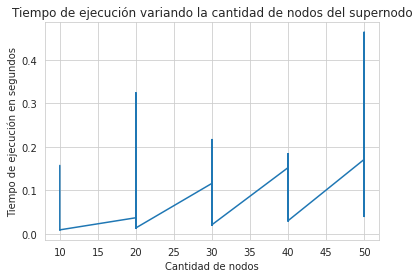

In [23]:

df = pd.DataFrame(data)
print(df)

sns.set_palette("tab10")
# sns.lineplot(df, x = "Densidad", y = "Tiempo", hue = "Metodo", dashes = False, markers=True)
plt.plot("Densidad", "Tiempo", data=df, hue="Metodo")

plt.title("Tiempo de ejecución variando la cantidad de nodos del supernodo")
plt.xlabel("Cantidad de nodos")
plt.ylabel("Tiempo de ejecución en segundos")
plt.show()

antisupernodo

In [12]:
antisupernodo10 = utils.read_results_time("test_antisupernodo_10.txtEG") + utils.read_results_time("test_antisupernodo_10.txtJac") + utils.read_results_time("test_antisupernodo_10.txtGS")

antisupernodo20 = utils.read_results_time("test_antisupernodo_20.txtEG") + utils.read_results_time("test_antisupernodo_20.txtJac") + utils.read_results_time("test_antisupernodo_20.txtGS")

antisupernodo30 = utils.read_results_time("test_antisupernodo_30.txtEG") + utils.read_results_time("test_antisupernodo_30.txtJac") + utils.read_results_time("test_antisupernodo_30.txtGS")

antisupernodo40 = utils.read_results_time("test_antisupernodo_40.txtEG") + utils.read_results_time("test_antisupernodo_40.txtJac") + utils.read_results_time("test_antisupernodo_40.txtGS")

antisupernodo50 = utils.read_results_time("test_antisupernodo_50.txtEG") + utils.read_results_time("test_antisupernodo_50.txtJac") + utils.read_results_time("test_antisupernodo_50.txtGS")



metodos = [i for k in range(0, 5) for i in ["EG", "Jac", "GS"] for j in range(0, 1000) ]

densidad = [i for i in range(10, 51, 10) for j in range(0, 1000) for k in range(0,3)]

resultados = antisupernodo10 + antisupernodo20 + antisupernodo30 + antisupernodo40 + antisupernodo50

data = {"Densidad": densidad, "Metodo": metodos, "Tiempo(seg)": resultados}

In [13]:
df = pd.DataFrame(data)

sns.lineplot(df, x = "Densidad", y = "Tiempo(seg)", hue = "Metodo", dashes = False, markers=True)

plt.title("Tiempo de ejecución variando la cantidad de nodos del antisupernodo")
plt.xlabel("Cantidad de nodos")
plt.ylabel("Tiempo de ejecución en segundos")
plt.show()

ValueError: Could not interpret value `Tiempo(seg)` for parameter `y`

clique

In [14]:
clique10 = utils.read_results_time("clique10.txtEG") + utils.read_results_time("clique10.txtJac") + utils.read_results_time("clique10.txtGS")

clique20 = utils.read_results_time("clique20.txtEG") + utils.read_results_time("clique20.txtJac") + utils.read_results_time("clique20.txtGS")

clique30 = utils.read_results_time("clique30.txtEG") + utils.read_results_time("clique30.txtJac") + utils.read_results_time("clique30.txtGS")

clique40 = utils.read_results_time("clique40.txtEG") + utils.read_results_time("clique40.txtJac") + utils.read_results_time("clique40.txtGS")

clique50 = utils.read_results_time("clique50.txtEG") + utils.read_results_time("clique50.txtJac") + utils.read_results_time("clique50.txtGS")

metodos = [i for k in range(0, 5) for i in ["EG", "Jac", "GS"] for j in range(0, 1000) ]

densidad = [i for i in range(10, 51, 10) for j in range(0, 1000) for k in range(0,3)]

resultados = clique10 + clique20 + clique30 + clique40 + clique50

data = {"Densidad": densidad, "Metodo": metodos, "Tiempo(seg)": resultados}

In [15]:
df = pd.DataFrame(data)

sns.lineplot(df, x = "Densidad", y = "Tiempo(seg)", hue = "Metodo", dashes = False, markers=True)

plt.title("Tiempo de ejecución variando la cantidad de nodos de la clique")
plt.xlabel("Cantidad de nodos")
plt.ylabel("Tiempo de ejecución en segundos")
plt.show()

ValueError: Could not interpret value `Tiempo(seg)` for parameter `y`

In [16]:

binomial_graph50_1 = utils.read_results_time("binomial_graph50_1.txtEG") + utils.read_results_time("binomial_graph50_1.txtJac") + utils.read_results_time("binomial_graph50_1.txtGS")

binomial_graph50_2 = utils.read_results_time("binomial_graph50_2.txtEG") + utils.read_results_time("binomial_graph50_2.txtJac") + utils.read_results_time("binomial_graph50_2.txtGS")

binomial_graph50_3 = utils.read_results_time("binomial_graph50_3.txtEG") + utils.read_results_time("binomial_graph50_3.txtJac") + utils.read_results_time("binomial_graph50_3.txtGS")

binomial_graph50_4 = utils.read_results_time("binomial_graph50_4.txtEG") + utils.read_results_time("binomial_graph50_4.txtJac") + utils.read_results_time("binomial_graph50_4.txtGS")

binomial_graph50_5 = utils.read_results_time("binomial_graph50_5.txtEG") + utils.read_results_time("binomial_graph50_5.txtJac") + utils.read_results_time("binomial_graph50_5.txtGS")

binomial_graph50_6 = utils.read_results_time("binomial_graph50_6.txtEG") + utils.read_results_time("binomial_graph50_6.txtJac") + utils.read_results_time("binomial_graph50_6.txtGS")

#binomial_graph50_8 = utils.read_results_time("binomial_graph50_8.txtEG") + utils.read_results_time("binomial_graph50_8.txtJac") + utils.read_results_time("binomial_graph50_8.txtGS")

#print(np.var(binomial_graph50_5))
#print(np.var(binomial_graph50_5))
#Si a binomial graph le ponemos prob 1 tenemos una clique
#clique50 = utils.read_results_time("clique50.txtEG") + utils.read_results_time("clique50.txtJac") + utils.read_results_time("clique50.txtGS")

metodos = [i for k in range(0, 6) for i in ["EG", "Jac", "GS"] for j in range(0, 1000) ]

print(len(metodos))

densidad = [nx.number_of_edges(nx.binomial_graph(50, i/10, seed = 2, directed= True)) for i in range(1, 7, 1) for j in range(0, 1000) for k in range(0,3)]

print(len(densidad))

resultados = binomial_graph50_1 + binomial_graph50_2 + binomial_graph50_3 + binomial_graph50_4 + binomial_graph50_5 + binomial_graph50_6 
print(len(resultados))
data = {"Densidad": densidad, "Metodo": metodos, "Tiempo(seg)": resultados}


18000
18000
18000


In [17]:
df = pd.DataFrame(data)

sns.lineplot(df, x = "Densidad", y = "Tiempo(seg)", hue = "Metodo", dashes = False, markers=True)

plt.title("Tiempo de ejecución variando la cantidad de nodos del binomial_graph")
plt.xlabel("Densidad")
plt.ylabel("Tiempo de ejecución en segundos")
plt.show()

ValueError: Could not interpret value `Tiempo(seg)` for parameter `y`

## **Convergencia**

Binomial

In [34]:

iters1, eps1 = utils.read_results_conv("binomial_graph50_1.txtJac")

iters2, eps2 = utils.read_results_conv("binomial_graph50_2.txtJac")

iters3, eps3 = utils.read_results_conv("binomial_graph50_3.txtJac")

iters4, eps4 = utils.read_results_conv("binomial_graph50_4.txtJac")

iters5, eps5 = utils.read_results_conv("binomial_graph50_5.txtJac")

iters6, eps6 = utils.read_results_conv("binomial_graph50_6.txtJac")



[1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]
[117, 109, 101, 93, 85, 77, 69, 61, 53, 45, 37, 29, 20, 12]


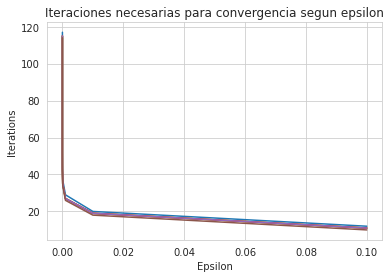

In [35]:

# df = pd.DataFrame(data)
# print(df)

# sns.set_palette("tab10")
# sns.lineplot(df, x = "Densidad", y = "Tiempo", hue = "Metodo", dashes = False, markers=True)
print(eps1)
print(iters1)
# plt.xscale("log")
# plt.yscale("log")
plt.plot(eps1, iters1)
plt.plot(eps2, iters2)
plt.plot(eps3, iters3)
plt.plot(eps4, iters4)
plt.plot(eps5, iters5)
plt.plot(eps6, iters6)

# plt.legend()
plt.title("Iteraciones necesarias para convergencia segun epsilon")
plt.ylabel("Iterations")
plt.xlabel("Epsilon")
plt.show()

In [30]:

iters1, eps1 = utils.read_results_conv("binomial_graph50_1.txtGS")

iters2, eps2 = utils.read_results_conv("binomial_graph50_2.txtGS")

iters3, eps3 = utils.read_results_conv("binomial_graph50_3.txtGS")

iters4, eps4 = utils.read_results_conv("binomial_graph50_4.txtGS")

iters5, eps5 = utils.read_results_conv("binomial_graph50_5.txtGS")

iters6, eps6 = utils.read_results_conv("binomial_graph50_6.txtGS")

[1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]
[64, 60, 56, 51, 47, 43, 38, 34, 30, 26, 21, 17, 13, 9]


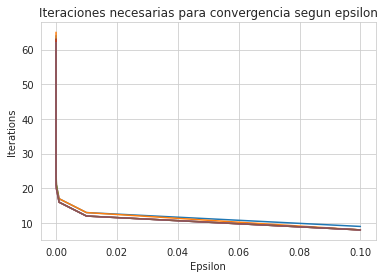

In [32]:

# df = pd.DataFrame(data)
# print(df)

# sns.set_palette("tab10")
# sns.lineplot(df, x = "Densidad", y = "Tiempo", hue = "Metodo", dashes = False, markers=True)
print(eps1)
print(iters1)
# plt.xscale("log")
# plt.yscale("log")
plt.plot(eps1, iters1)
plt.plot(eps2, iters2)
plt.plot(eps3, iters3)
plt.plot(eps4, iters4)
plt.plot(eps5, iters5)
plt.plot(eps6, iters6)

# plt.legend()
plt.title("Iteraciones necesarias para convergencia segun epsilon")
plt.ylabel("Iterations")
plt.xlabel("Epsilon")
plt.show()